## <span style="color:red"> Homework 3 </span>

With your toy dataset, now select an appropriate quantitative outcome - the same one you used for the homework on regression or another. <br> 
All the other variables are to be used as predictors. <br>
Be careful: ID variables should not be part of the modeling !

### Step 1 : Reading Assignment

As usual, the reading assignment is part of the next quiz

Read Section 8.2 (pp 343-354) of our Textbook [An Introduction to Statistical Learning - with Applications in Python](https://www.statlearning.com/)



In [2]:
### Used chatGPT for some help

### Step 2 : Handling categorical data

There are mainly two ways of handling categorical data :

1. One-hot encoding (OHE). Use pd.get_dummies or sklearn `OneHotEncoder modules`.<br>
    a. First explain what OHE accomplishes, in a small paragraph with its up and down sides.<br>
    b. Apply OHE to all of your categorical variables.<br>
    


In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("cleaned_repositories.csv")
df.head()

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
0,freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24T17:49:19Z,2023-09-21T11:32:33Z,http://contribute.freecodecamp.org/,387451,374074,33599,248,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,main
1,free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-progra...,2013-10-11T06:50:37Z,2023-09-21T11:09:25Z,https://ebookfoundation.github.io/free-program...,17087,298393,57194,46,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,main
2,awesome,😎 Awesome lists about all kinds of interesting...,https://github.com/sindresorhus/awesome,2014-07-11T13:42:37Z,2023-09-21T11:18:22Z,NaN,1441,269997,26485,61,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,main
3,996.ICU,Repo for counting stars and contributing. Pres...,https://github.com/996icu/996.ICU,2019-03-26T07:31:14Z,2023-09-21T08:09:01Z,https://996.icu,187799,267901,21497,16712,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,master
4,coding-interview-university,A complete computer science study plan to beco...,https://github.com/jwasham/coding-interview-un...,2016-06-06T02:34:12Z,2023-09-21T10:54:48Z,NaN,20998,265161,69434,56,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,main


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             10000 non-null  object 
 1   Description      9925 non-null   object 
 2   URL              10000 non-null  object 
 3   Created At       10000 non-null  object 
 4   Updated At       10000 non-null  object 
 5   Homepage         6067 non-null   object 
 6   Size             10000 non-null  int64  
 7   Stars            10000 non-null  int64  
 8   Forks            10000 non-null  int64  
 9   Issues           10000 non-null  int64  
 10  Watchers         10000 non-null  int64  
 11  Language         9104 non-null   object 
 12  License          8792 non-null   object 
 13  Topics           10000 non-null  object 
 14  Has Issues       10000 non-null  float64
 15  Has Projects     10000 non-null  float64
 16  Has Downloads    10000 non-null  float64
 17  Has Wiki     

####  One-hot encoding (OHE)
a. One-Hot Encoding (OHE) is a method for converting categorical variables into binary matrix representations. 
OHE displays each unique label with its own column, containing binary values indicating the presence (1) or absence (0) of the label, as opposed to portraying a categorical variable with a single column of several labels. Categorical data can be understood and used by linear algorithms thanks to this conversion. <br>
OHE has the advantages of being simple and straightforward to implement, and it performs better with certain algorithms, particularly when the ordinal relationship is weak or non-linear.<br>
Nevertheless, there are disadvantages such as: OHE, particularly for categorical variables with a high number of unique labels, can result in a significant rise in the dimensionality of the dataset. As a result, models may become increasingly complicated and challenging to train, and prone to overfitting. An additional drawback applies to the loss of ordinal relationships, as OHE ignores the potential importance of the original category order.

In [13]:
df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(exclude=['object'])

In [14]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse_output=False)

In [15]:
df_cat_ohe = pd.DataFrame(OHE.fit_transform(df_cat))
df_cat_ohe.columns = OHE.get_feature_names_out()

In [16]:
df_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 62201 entries, Name_.NET-Backend-Developer-Roadmap to Default Branch_自由浏览-3.2.5
dtypes: float64(62201)
memory usage: 4.6 GB


In [17]:
display(df_cat_ohe.head())

,Name_.NET-Backend-Developer-Roadmap,Name_.tmux,Name_100-Days-Of-ML-Code,Name_100-days-of-code,Name_100-go-mistakes,Name_100days,Name_1024app-android,Name_123-Essential-JavaScript-Interview-Questions,Name_12306,Name_1Panel,...,Default Branch_v5-stable,Default Branch_v7,Default Branch_v7.x,Default Branch_v8.x,Default Branch_vNext,Default Branch_version_component,Default Branch_vxp,Default Branch_wasm,Default Branch_wildfirechat,Default Branch_自由浏览-3.2.5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df_ohe = pd.concat([df_num, df_cat_ohe], axis=1)
df_ohe.info()
df_ohe.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 62215 entries, Size to Default Branch_自由浏览-3.2.5
dtypes: float64(62210), int64(5)
memory usage: 4.6 GB


,Size,Stars,Forks,Issues,Watchers,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,...,Default Branch_v5-stable,Default Branch_v7,Default Branch_v7.x,Default Branch_v8.x,Default Branch_vNext,Default Branch_version_component,Default Branch_vxp,Default Branch_wasm,Default Branch_wildfirechat,Default Branch_自由浏览-3.2.5
0,387451,374074,33599,248,374074,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17087,298393,57194,46,298393,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1441,269997,26485,61,269997,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 2. Numericalization. Use sklearn LabelEncoder or better yet the method `astype('category')` followed by the attributes `.cat.codes` <br>
    a. First explain what numericalization entails with its up and down sides. <br>
    b. Apply numericalization on your chosen categorical variables. <br>
 

a. Numericalization is the process of transforming categorical values or text into numerical representations so that machine learning algorithms can process them. The benefits include preserving dimensionality of the data by mapping each category to an unique integer, using less memory, and accelerating computations because a large matrix of binary values does not require to be processed and stored. 
<br> The drawbacks are that it imposes an arbitrary order on nominal categories. These numbers could be seen as having an ordinal relationship by machine learning algorithms, which could result in inaccurate model interpretations and predictions. Because categories are represented by a range of values, it can occasionally be more difficult to determine whether particular categories are present in the model or during exploratory.

b. 

In [11]:
for col in df:
    df[col] = df[col].astype('category').cat.codes

print(df.head())

   Name  Description   URL  Created At  Updated At  Homepage  Size  Stars  \
0  4482         8343  4248        3377        8461       200  7974   6587   
1  4479          176   430        2183        7993      2263  4181   6586   
2  2544         9747  8435        2905        8179        -1  1013   6585   
3    44         6328    47        7966        5442      1254  7447   6584   
4  3379          926  5586        5120        7691        -1  4478   6583   

   Forks  Issues  ...  Has Issues  Has Projects  Has Downloads  Has Wiki  \
0   3735     248  ...           1             1              1         0   
1   3758      46  ...           1             0              1         0   
2   3716      61  ...           1             0              1         0   
3   3689    1158  ...           0             0              1         0   
4   3761      56  ...           1             0              1         0   

   Has Pages  Has Discussions  Is Fork  Is Archived  Is Template  \
0          1

   
### Step 3 : Training models with default parameters

1. Use sklearn `train_test_split` to select a training sample and a test sample.


In [12]:
from sklearn.model_selection import train_test_split

# features and target. Removed irrelevant columns too
X = df.drop(['Created At', 'Updated At', 'Stars'], axis=1)
y = df['Stars']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Test set has {X_test.shape[0]} samples.")

Training set has 8000 samples.
Test set has 2000 samples.


2. Train at least three differents models (one of them should not be tree-based).


In [14]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)


# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt_reg = dt_reg.predict(X_test)


# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)

3. Select the appropriate metrics to estimate scores and compare performance between the models.


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def compute_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rmse_per_mean = rmse / np.mean(y_true)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, rmse_per_mean, r2

# Compute metrics for Linear Regression
mae_lin, mse_lin, rmse_lin, rmse_per_mean_lin, r2_lin = compute_metrics(y_test, y_pred_lin_reg)
print(f"Linear Regression - MAE: {mae_lin}, MSE: {mse_lin}, RMSE: {rmse_lin}, RMSE: {rmse_per_mean_lin*100}, R2: {r2_lin}")

# Compute metrics for Decision Tree
mae_dt, mse_dt, rmse_dt, rmse_per_mean_dt, r2_dt = compute_metrics(y_test, y_pred_dt_reg)
print(f"Decision Tree - MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, RMSE: {rmse_per_mean_dt*100}, R2: {r2_dt}")

# Compute metrics for Random Forest
mae_rf, mse_rf, rmse_rf, rmse_per_mean_rf, r2_rf = compute_metrics(y_test, y_pred_rf_reg)
print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, RMSE: {rmse_per_mean_rf*100}, R2: {r2_rf}")


Linear Regression - MAE: 1.2536791911731423e-12, MSE: 2.420456572405097e-24, RMSE: 1.5557816596184366e-12, RMSE%: 5.722436347787713e-14, R2: 1.0
Decision Tree - MAE: 1.436, MSE: 4.052, RMSE: 2.012958022413781, RMSE%: 0.07404010763860396, R2: 0.9999989148530418
Random Forest - MAE: 0.6090299999999967, MSE: 0.6599384999999941, RMSE: 0.8123659889483275, RMSE%: 0.029880238233458423, R2: 0.9999998232649912


Better model performance is shown by lower MAE, MSE, and RMSE values.<br>
A higher R2 value suggests that a greater proportion of the variance in the target variable is explained by the model.

4. Which handling of the categorical data is best ?


For nominal data with low cardinality, one-hot encoding is often the best choice. Binary vectors are created via OHE from category variables. It works well in situations when there is no original ordinal relationship between the categories and you cannot assume that there is a numerical relationship between them. Random Forest and other tree-based algorithms work nicely with OHE.

For ordinal data, when there is a significant order amongst the categories, label encoding is more appropriate. However, for non-tree-based models, this can be problematic since certain algorithms might interpret the encoded integers as having mathematical significance.
 

For nominal data with high cardinality, methods like binary encoding can be more suitable. The intersection between label and one-hot encoding is binary encoding. Like label encoding, it begins by giving each category a unique integer label. Subsequently it converts each integer into a binary representation by representing these numbers as binary code. This binary code's digits are organised into distinct columns. Compared to one-hot encoding, this method lowers the dimensionality of the data, which makes it especially efficient for categorical data with high cardinality.



### Step 4 : Tuning model

1. Select the best model among the previous ones and do sequential tuning (one parameter at a time with a plot) on at least two of the parameters. <br>

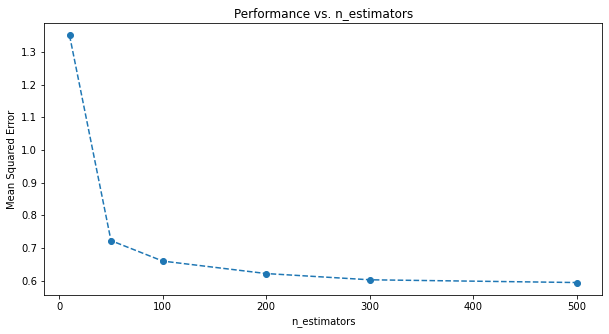

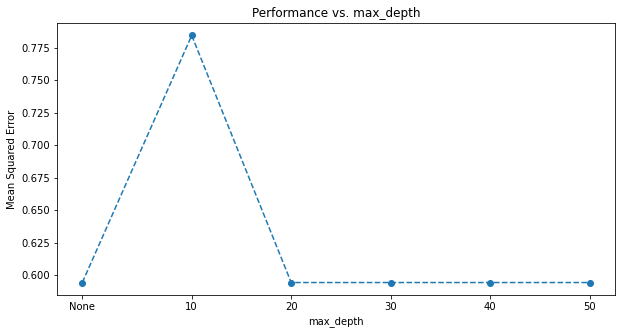

In [22]:
import matplotlib.pyplot as plt

# Define the hyperparameter values to be tested for n_estimators
n_estimators_range = [10, 50, 100, 200, 300, 500]
mse_scores_estimators = []

for n in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse_scores_estimators.append(mean_squared_error(y_test, y_pred))

# Plotting the results for n_estimators
plt.figure(figsize=(10,5))
plt.plot(n_estimators_range, mse_scores_estimators, marker='o', linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error')
plt.title('Performance vs. n_estimators')
plt.show()

best_n_estimators = n_estimators_range[np.argmin(mse_scores_estimators)]

# Tune max_depth using the best n_estimators value
max_depth_range = [-1, 10, 20, 30, 40, 50]  # -1 as a placeholder for None
mse_scores_depth = []

for depth in max_depth_range:
    if depth == -1:
        depth_value = None
    else:
        depth_value = depth
        
    rf = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=depth_value, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse_scores_depth.append(mean_squared_error(y_test, y_pred))

# Plotting the results for max_depth
plt.figure(figsize=(10,5))
plt.plot(max_depth_range, mse_scores_depth, marker='o', linestyle='--')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.title('Performance vs. max_depth')
plt.xticks(max_depth_range, ['None' if depth == -1 else depth for depth in max_depth_range])
plt.show()

best_max_depth = max_depth_range[np.argmin(mse_scores_depth)]
if best_max_depth == -1:
    best_max_depth = None


    a. Print the values of the best parameters 

In [23]:
print(f"The best value for n_estimators is: {best_n_estimators}")
print(f"The best value for max_depth is: {best_max_depth if best_max_depth is not None else 'None (full expansion)'}")

The best value for n_estimators is: 500
The best value for max_depth is: None (full expansion)


When additional estimators are introduced, performance initially becomes better, although eventually the returns start to diminish. The MSE steadily decreases as the number of trees grow (from 0 to about 100).
The increase in MSE plateaus and slows down after about 100 trees. This implies that the model's performance fails to grow significantly with more trees added after a certain point.

     b. Give the score of the tuned model on the test set 

In [24]:
# Train Random Forest with the best hyperparameters
tuned_rf = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
tuned_rf.fit(X_train, y_train)
y_pred_tuned = tuned_rf.predict(X_test)

# Evaluate the tuned model
mse = mean_squared_error(y_test, y_pred_tuned)
mae = mean_absolute_error(y_test, y_pred_tuned)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tuned)

# Print the results
print(f"Performance of the tuned model on the test set:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R2): {r2:.3f}")

Performance of the tuned model on the test set:
Mean Squared Error (MSE): 0.594
Root Mean Squared Error (RMSE): 0.771
Mean Absolute Error (MAE): 0.583
R-squared (R2): 1.000


2. Use `GridSearchCV` or `RandomizedSearchCV` from sklearn to tune 2 or more parameters <br>
    a. Print the best parameters <br>
    

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_dist = {
    'n_estimators': randint(10, 500),
    'max_depth': [None] + list(range(1, 51))
}

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                                   param_distributions=param_dist,
                                   n_iter=100, 
                                   cv=5, 
                                   verbose=1, 
                                   n_jobs=-1, 
                                   random_state=42)

# Fit the data to the RandomizedSearchCV object
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:")
print(random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:
{'max_depth': 29, 'n_estimators': 494}


    b. Save the best model and print its score on the test set 


In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Save the best model
best_rf_model = random_search.best_estimator_

# Save the model to a file
filename = 'best_random_forest_model.pkl'
joblib.dump(best_rf_model, filename)
print(f"Model saved as {filename}")

# Predict using the best model on test set
y_pred = best_rf_model.predict(X_test)

# Print its score on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Test Set: {mse:.4f}")
print(f"R^2 Score on Test Set: {r2:.4f}")

Model saved as best_random_forest_model.pkl
Mean Squared Error on Test Set: 0.5946
R^2 Score on Test Set: 1.0000
